In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/irisnew/label.csv
/kaggle/input/irisnew/iris.csv


In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
df1 = pd.read_csv("../input//irisnew/iris.csv")
df2 = pd.read_csv("../input/irisnew/label.csv")
df = pd.concat([df1,df2],axis = 1)

df.describe()

,a,b,c,d,Label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.546667
std,0.828066,0.433594,1.764420,0.763161,1.096588
min,4.300000,2.000000,1.000000,0.100000,-1.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000


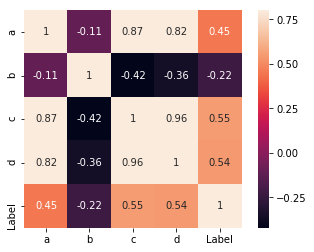

In [4]:
df = df.drop(['label'], axis = 1)
corrm = df.corr()
sns.heatmap(corrm,annot = True,vmax = .8, square = True)

X = df.iloc[:,[0,2,3]].values
y = df.iloc[:,-1].values

In [5]:
def dist_func(x,y):
    
    ans = 0
    for i in range(len(x)-1):
        ans += pow(x[i] - y[i],2)
    
    
    return math.sqrt(ans)

In [6]:
def kmeans(ds,centroid,k):
    
    max_iter = 100
    
    for i in range(max_iter):
        
        d = {}
        for i in range(k):
            d[i]=[]
            
        d1 = {}
        for i in range(k):
            d1[i]=[]
            
        for j in range(len(ds)):
            l= []
                
            for m in centroid:
                
                l.append(dist_func(m,ds[j]))
                
            d[l.index(min(l))].append(ds[j])
            
            
        
        for z in d:
            centroid[z] = np.average(d[z],axis = 0)
            
        
        
    return d

In [7]:
def rec_kmeans(ds):
    
    
    li = set()
        
    for j in ds:
        
        if(j[3] != -1):
            li.add(j[3])
        
        
    
    if(len(li) == 1):
        final_clusters.append(ds)
        cluster_label.append(li)
        return

    
    if(len(li) == 0):
        final_clusters.append(ds)
        cluster_label.append(-1)
        return
    
    
    
    newk = len(li)
    centroid = []
    
    for i in range(newk):
        centroid.append(ds[i])
    
    r = kmeans(ds,centroid,newk)
    
    for z in r:
        z1 = r[z]
        rec_kmeans(z1)

In [8]:
k = 3

X = pd.DataFrame(X)
y = pd.DataFrame(y)
X1 = pd.concat([X,y],axis = 1)

X_training = X1.iloc[:,0:4].values

final_clusters = []
cluster_label = []
centr = []
for i in range(k):
        centr.append(X_training[i])


#initial Kmeans call  
res = kmeans(X_training,centr,k)


2
2
1


Text(0, 0.5, 'No of class labels')

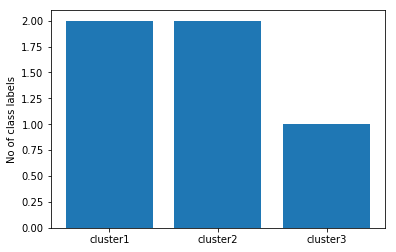

In [9]:
dt = ["cluster1","cluster2","cluster3"]
dty = []
for i in res:
    lbl = set()
    for j in res[i]:
        if(j[3] != -1):
            lbl.add(int(j[3]))
    
    print(len(lbl))       
    dty.append(len(lbl))

plt.bar(dt,dty)        
plt.ylabel("No of class labels")

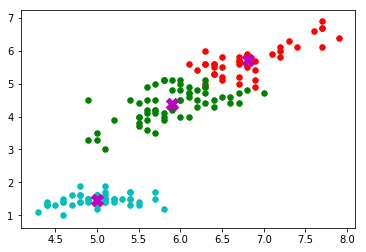

In [10]:
colors = ["r", "g", "c", "b", "k"]



for c in res:
	color = colors[c]
	for features in res[c]:
		plt.scatter(features[0], features[1], color = color,s = 30)


for c in centr:
    plt.scatter(c[0],c[1],marker = 'X',s = 150 ,color = 'm')
        

plt.show()


In [11]:
#recursive Kmeans call for every partition in res
for par in res:    
    pi = res[par]
    rec_kmeans(pi)
    





In [12]:
#calculating final centroids
final_centroids = []
for i in final_clusters:
    final_centroids.append(np.average(i,axis = 0))



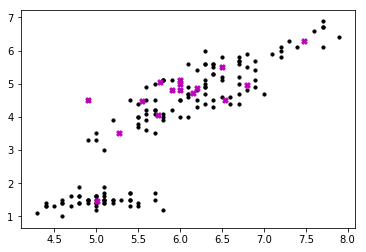

In [13]:
#ploting final results

for fea in final_clusters:
    for k in fea:
        plt.scatter(k[0], k[1], color = "k",s = 10)



for cen in final_centroids:
    plt.scatter(cen[0],cen[1],marker = "X",color = "m",s = 30)
    
   
plt.show()

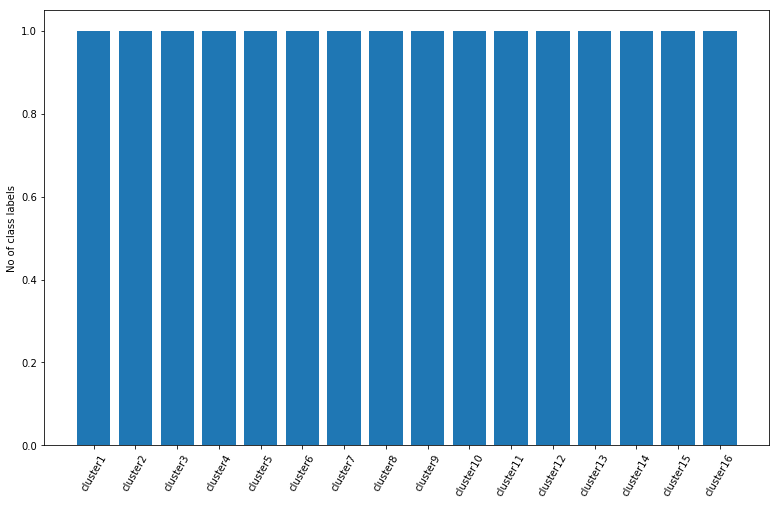

In [14]:
dtf = [f'cluster{i}' for i in range(1,len(final_clusters) + 1)]
dtfy = []
for i in final_clusters:
    lbl = set()
    for j in i:
        if(j[3] != -1):
            lbl.add(int(j[3]))
    
    
    dtfy.append(len(lbl))

    
plt.figure(figsize = (13,8))
plt.bar(dtf,dtfy)
plt.xticks(rotation = 60)
plt.ylabel("No of class labels")
plt.show()

In [15]:
results = pd.DataFrame(dtf,columns = ['Clusters'])
no_of_points = []
labelled = []
unlabelled = []

cluster_lbl = []

for i in cluster_label:
    cluster_lbl.append(int(list(i)[0]))
    
results['Label'] = cluster_lbl  
    
    
for i in range(len(final_clusters)):
    no_of_points.append(len(final_clusters[i]))
    cl = 0
    cu = 0
    for j in final_clusters[i]:
        if(j[3] == -1):
            cu += 1
        else:
            cl += 1
    
    labelled.append(cl)
    unlabelled.append(cu)

results['Total_no_of_data'] = no_of_points
results['No_of_ld'] = labelled
results['No_of_ud'] = unlabelled

In [16]:
print(results)

     Clusters  Label  Total_no_of_data  No_of_ld  No_of_ud
0    cluster1      1                 2         2         0
1    cluster2      2                26        20         6
2    cluster3      2                12        10         2
3    cluster4      1                12         9         3
4    cluster5      2                 5         3         2
5    cluster6      1                 1         1         0
6    cluster7      2                 1         1         0
7    cluster8      2                 3         2         1
8    cluster9      1                 1         1         0
9   cluster10      2                 1         1         0
10  cluster11      1                 8         5         3
11  cluster12      1                 9         5         4
12  cluster13      1                14        12         2
13  cluster14      1                 4         4         0
14  cluster15      2                 1         1         0
15  cluster16      0                50        40        

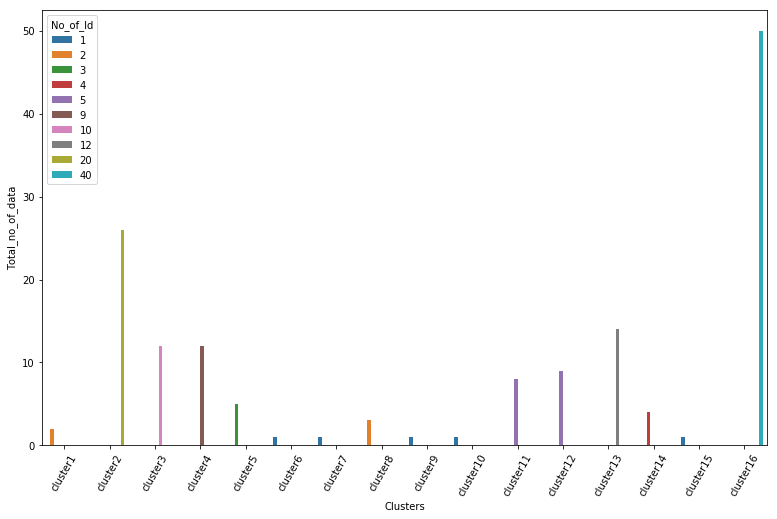

In [17]:
plt.figure(figsize = (13,8))
sns.barplot(x = 'Clusters',y = 'Total_no_of_data',hue = 'No_of_ld',data = results)
plt.xticks(rotation = 60)
plt.show()

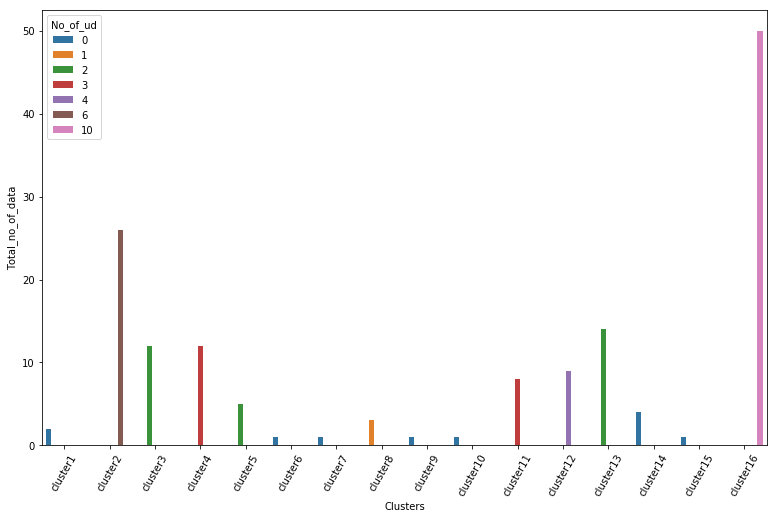

In [18]:
plt.figure(figsize = (13,8))
sns.barplot(x = 'Clusters' , y = "Total_no_of_data",hue = 'No_of_ud',data = results)
plt.xticks(rotation = 60)
plt.show()